In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


from scipy import stats  # For statistical tests
from scipy.stats import chi2_contingency  # For Chi-Square test
import statsmodels.api as sm  # For ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [31]:
data = pd.read_csv('Students_Grading_Dataset.csv')

In [32]:
data

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [33]:
data.shape  # (rows, columns)


(5000, 23)

In [35]:
data.columns  # Column names

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [40]:
data.info  # Data types + Missing values check


<bound method DataFrame.info of      Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    Male   19   
4996      S5996       Emma     Brown  student4996@university.com    Male   19   
4997      S5997       John     Brown  student4997@university.com  Female   24   
4998      S5998       Sara     Davis  student4998@university.com    Male   23   
4999      S5999      Maria     Brown  student4999@university.com  Female   21

In [41]:
# Check if there are any missing values left
data.isnull().sum()


Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [42]:
data.duplicated().sum()

0

In [43]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.05,1.99,18.00,19.00,21.00,23.00,24.00
Attendance (%),4484.0,75.43,14.37,50.01,63.26,75.72,87.47,100.00
Midterm_Score,5000.0,70.33,17.21,40.00,55.46,70.51,84.97,99.98
Final_Score,5000.0,69.64,17.24,40.00,54.67,69.74,84.50,99.98
Assignments_Avg,4483.0,74.80,14.41,50.00,62.09,74.81,86.97,99.98
Quizzes_Avg,5000.0,74.91,14.50,50.03,62.49,74.69,87.63,99.96
Participation_Score,5000.0,4.98,2.89,0.00,2.44,4.96,7.50,10.00
Projects_Score,5000.0,74.92,14.42,50.01,62.32,74.98,87.37,100.00
Total_Score,5000.0,75.12,14.40,50.02,62.84,75.40,87.65,99.99
Study_Hours_per_Week,5000.0,17.66,7.28,5.00,11.40,17.50,24.10,30.00


In [44]:
data.describe(include='object')


,Student_ID,First_Name,Last_Name,Email,Gender,Department,Grade,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,3206,5000
unique,5000,8,6,5000,2,4,5,2,2,4,3
top,S1000,Maria,Johnson,student0@university.com,Male,CS,A,No,Yes,PhD,Low
freq,1,657,868,1,2551,2022,1495,3493,4485,820,1983


In [45]:
for column in ['Department', 'Grade', 'Parent_Education_Level', 'Family_Income_Level']:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n")
    print("\n".join(map(str, unique_values)))  
    print("\n" + "=" * 50 + "\n")  

Unique values in column 'Department':

Engineering
Business
Mathematics
CS


Unique values in column 'Grade':

F
A
D
B
C


Unique values in column 'Parent_Education_Level':

High School
nan
Master's
PhD
Bachelor's


Unique values in column 'Family_Income_Level':

Medium
Low
High




Handle missing values and perform basic data cleaning.

In [46]:
df = data.copy(deep=True)

In [47]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [48]:
df_number_columns = df.select_dtypes('number').columns
df_number_columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

In [49]:
df_object_columns = df.select_dtypes('object').columns
df_object_columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender',
       'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

In [50]:
df.isna().sum() / len(df) * 100

Student_ID                     0.00
First_Name                     0.00
Last_Name                      0.00
Email                          0.00
Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        35.88
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64

Cleaning Data

Checking whether the student's Email matches their Student_ID or is correctly associated with it.


In [51]:
def check_id_email_match(row):
    student_id_num = row['Student_ID'][1:]  # Removes 'S' and keeps the rest ('1008' from 'S1008')

    if row['Student_ID'].startswith('S1'):
        student_id_num = student_id_num[1:]  # Remove the first '1'
        student_id_num = student_id_num.lstrip('0')  # '1008' -> '8', '1999' -> '999'

        if student_id_num == "":
            student_id_num = "0"

    else:
        student_id_num = str(int(student_id_num) - 1000)  # '2000' -> '1000', '2001' -> '1001'

    email_num = row['Email'].split('student')[1].split('@')[0]  # Extracts '8' from 'student8@university.com'

    return student_id_num == email_num


In [52]:
df['Match'] = df.apply(check_id_email_match, axis=1)
matching_rows = df[df['Match'] == True].shape
matching_rows


(5000, 24)

In [53]:
df["First_Name"].unique()


array(['Omar', 'Maria', 'Ahmed', 'John', 'Liam', 'Sara', 'Emma', 'Ali'],
      dtype=object)

In [54]:
male_names = ['Omar', 'Ahmed', 'John', 'Liam', 'Ali']
female_names = ['Maria', 'Sara', 'Emma']

def correct_gender(row):
    if row['First_Name'] in male_names and row['Gender'] != 'Male':
        return 'Male'
    elif row['First_Name'] in female_names and row['Gender'] != 'Female':
        return 'Female'
    else:
        return row['Gender']

In [55]:

df['Gender'] = df.apply(correct_gender, axis=1)
df


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Match
0,S1000,Omar,Williams,student0@university.com,Male,22,Engineering,52.29,55.03,57.82,...,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,True
1,S1001,Maria,Brown,student1@university.com,Female,18,Engineering,97.27,97.23,45.80,...,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0,True
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,True
3,S1003,Omar,Williams,student3@university.com,Male,24,Mathematics,95.15,47.79,80.63,...,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,True
4,S1004,John,Smith,student4@university.com,Male,23,CS,54.18,46.59,78.89,...,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,85.21,D,25.5,No,Yes,High School,Low,10,8.3,True
4996,S5996,Emma,Brown,student4996@university.com,Female,19,Business,65.11,86.31,49.80,...,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0,True
4997,S5997,John,Brown,student4997@university.com,Male,24,CS,87.54,63.55,64.21,...,54.25,A,24.8,Yes,No,High School,Medium,4,6.3,True
4998,S5998,Sara,Davis,student4998@university.com,Female,23,CS,92.56,79.79,94.28,...,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4,True


In [56]:
def assign_grade(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'

In [57]:
df['Grade'] = df['Total_Score'].apply(assign_grade)
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Match
0,S1000,Omar,Williams,student0@university.com,Male,22,Engineering,52.29,55.03,57.82,...,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,True
1,S1001,Maria,Brown,student1@university.com,Female,18,Engineering,97.27,97.23,45.80,...,50.64,F,19.0,No,Yes,NaN,Medium,4,9.0,True
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,70.30,C,20.7,No,Yes,Master's,Low,6,6.2,True
3,S1003,Omar,Williams,student3@university.com,Male,24,Mathematics,95.15,47.79,80.63,...,61.63,D,24.8,Yes,Yes,High School,High,3,6.7,True
4,S1004,John,Smith,student4@university.com,Male,23,CS,54.18,46.59,78.89,...,66.13,D,15.4,Yes,Yes,High School,High,2,7.1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,85.21,B,25.5,No,Yes,High School,Low,10,8.3,True
4996,S5996,Emma,Brown,student4996@university.com,Female,19,Business,65.11,86.31,49.80,...,95.96,A,5.0,No,Yes,NaN,Medium,4,4.0,True
4997,S5997,John,Brown,student4997@university.com,Male,24,CS,87.54,63.55,64.21,...,54.25,F,24.8,Yes,No,High School,Medium,4,6.3,True
4998,S5998,Sara,Davis,student4998@university.com,Female,23,CS,92.56,79.79,94.28,...,55.84,F,16.1,Yes,Yes,Bachelor's,Low,1,8.4,True


Missing Values

To handle the missing values, we have a few approaches:

Remove Missing Values: Delete the entire column, but that is not ideal here since the percentage of missing values is only around 10%.

Impute Missing Values : Fill the missing values with either the mean or median if the data type is numerical, or with the mode if the data type is categorical (string or object).

Here, I will use the median instead of the mean to avoid the distortion caused by outlier values.


In [58]:
df.fillna({"Attendance (%)": df["Attendance (%)"].median()}, inplace=True)

In [59]:
df["Attendance (%)"].isnull().sum()

0

In [60]:
df.fillna({"Assignments_Avg": df["Assignments_Avg"].median()}, inplace=True)

In [61]:
df["Attendance (%)"].isnull().sum()

0

In [62]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0])

In [63]:
df["Parent_Education_Level"].isnull().sum()

0

In [64]:
df.isna().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
Match                         0
dtype: int64

In [65]:
columns_to_check = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg','Projects_Score']

for column in columns_to_check:
    max_value = df[column].max()
    print(f"The maximum value in '{column}' is: {max_value}")

The maximum value in 'Attendance (%)' is: 100.0
The maximum value in 'Midterm_Score' is: 99.98
The maximum value in 'Final_Score' is: 99.98
The maximum value in 'Assignments_Avg' is: 99.98
The maximum value in 'Quizzes_Avg' is: 99.96
The maximum value in 'Projects_Score' is: 100.0


In [66]:
columns_to_check = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg','Projects_Score']

# Loop through each column and check if any value exceeds 100
for column in columns_to_check:
    if (df[column] > 100).any():
        print(f"Warning: Some values in '{column}' exceed 100.")
    else:
        print(f"All values in '{column}' are within the valid range.")

All values in 'Attendance (%)' are within the valid range.
All values in 'Midterm_Score' are within the valid range.
All values in 'Final_Score' are within the valid range.
All values in 'Assignments_Avg' are within the valid range.
All values in 'Quizzes_Avg' are within the valid range.
All values in 'Projects_Score' are within the valid range.


In [67]:
columns_to_check = ['Participation_Score','Stress_Level (1-10)']

# Loop through each column and check if any value exceeds 100
for column in columns_to_check:
    if (df[column] > 10).any():
        print(f"Warning: Some values in '{column}' exceed 100.")
    else:
        print(f"All values in '{column}' are within the valid range.")

All values in 'Participation_Score' are within the valid range.
All values in 'Stress_Level (1-10)' are within the valid range.


Checking for Outliers

Outliers are data points that significantly differ from other observations. Detecting and handling them is important because they can distort analysis and lead to incorrect conclusions.

Using the Interquartile Range (IQR) Method : The IQR method identifies outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

If the outlier count is 0, that column has no outliers.
If the outlier count is greater than 0, that column contains outliers.

In [68]:
numerical_columns = df.select_dtypes(include=['number']).columns

outlier_counts = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]


    outlier_counts[column] = num_outliers


outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_counts_df

,Outlier Count
Age,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0
Projects_Score,0
Total_Score,0
Study_Hours_per_Week,0


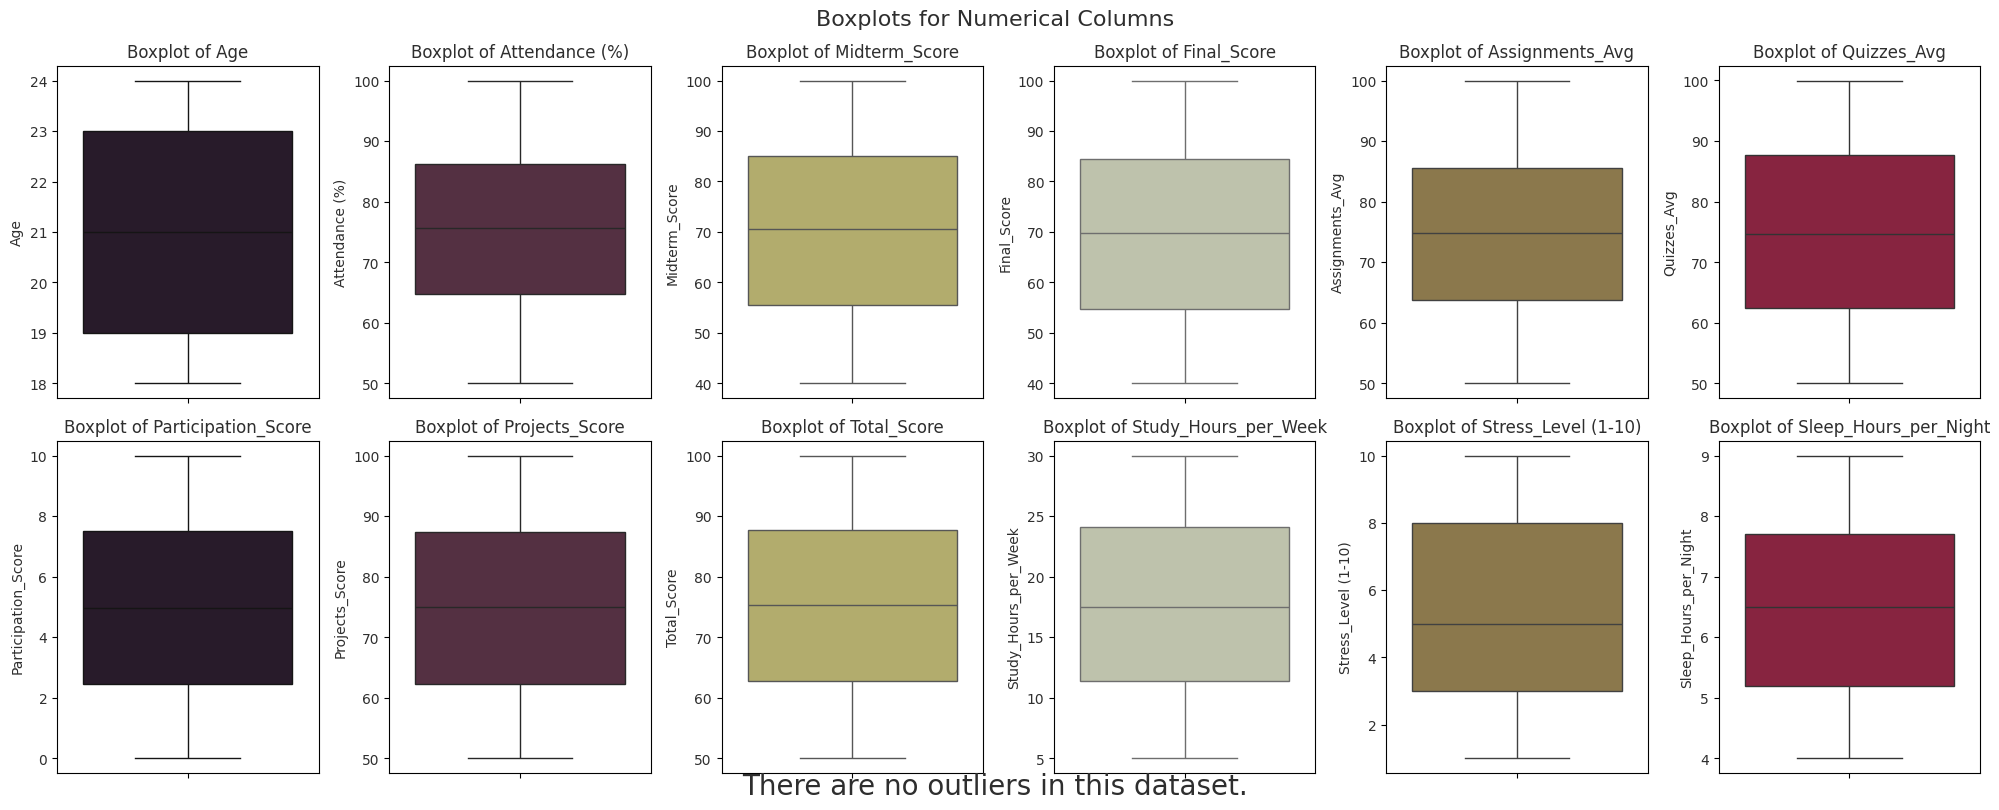

In [69]:
plt.figure(figsize=(20, 8))
custom_colors = ["#2A192C", "#5A2A42", "#BDB562", "#C1C6A8", "#967C41", "#971439"]

for i, column in enumerate(df_number_columns, 1):
    plt.subplot(2, (len(df_number_columns) + 1) // 2, i)
    sns.boxplot(y=df[column], color=custom_colors[(i - 1) % len(custom_colors)])
    plt.title(f'Boxplot of {column}', color='#2E2E2E')
    plt.ylabel(column, color='#2E2E2E')
    plt.xticks(color='#2E2E2E')
    plt.yticks(color='#2E2E2E')

plt.suptitle('Boxplots for Numerical Columns', fontsize=16, color='#2E2E2E')
plt.figtext(0.5, -0.001, "There are no outliers in this dataset.", ha="center", fontsize=20, color="#2E2E2E")
plt.tight_layout()
plt.show()

Conduct exploratory data analysis (EDA) using visualizations.¶
PLOTLY LIBRARY TAKES TIME BEFORE BEING DISPLAYED

Data visualization is a crucial step in exploratory data analysis (EDA) as it helps in understanding patterns, trends, and relationships within the data. Different visualization techniques are used depending on the type of data and the analysis goals.

In [70]:
custom_colors = ["#2A192C", "#5A2A42", "#BDB562", "#C1C6A8", "#967C41", "#971439"]

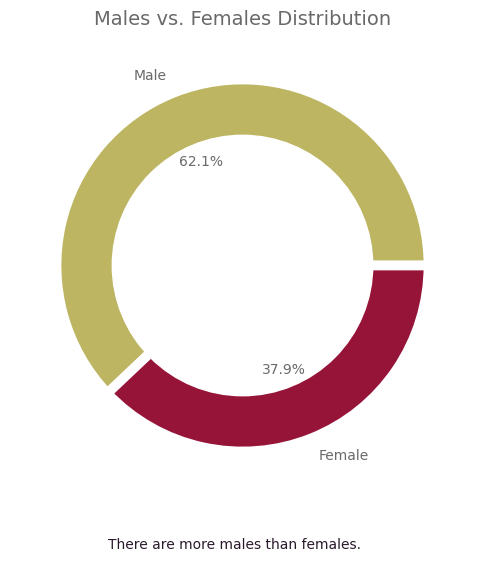

In [71]:
plt.figure(figsize=(6, 7))

my_circle = plt.Circle((0, 0), 0.7, color='white')


gender_counts = df['Gender'].value_counts()
colors = ["#BDB562", "#971439"]

plt.pie(gender_counts,
        labels=gender_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 7, 'edgecolor': 'white'},
        textprops={'color': 'dimgrey'})

p = plt.gcf()
p.gca().add_artist(my_circle)


plt.title("Males vs. Females Distribution", fontsize=14, color="dimgrey")

plt.figtext(0.5, 0.09, "There are more males than females.",
            ha="center", fontsize=10, color=custom_colors[0])

plt.show()

In [72]:
df['Gender'].value_counts()

Gender
Male      3103
Female    1897
Name: count, dtype: int64

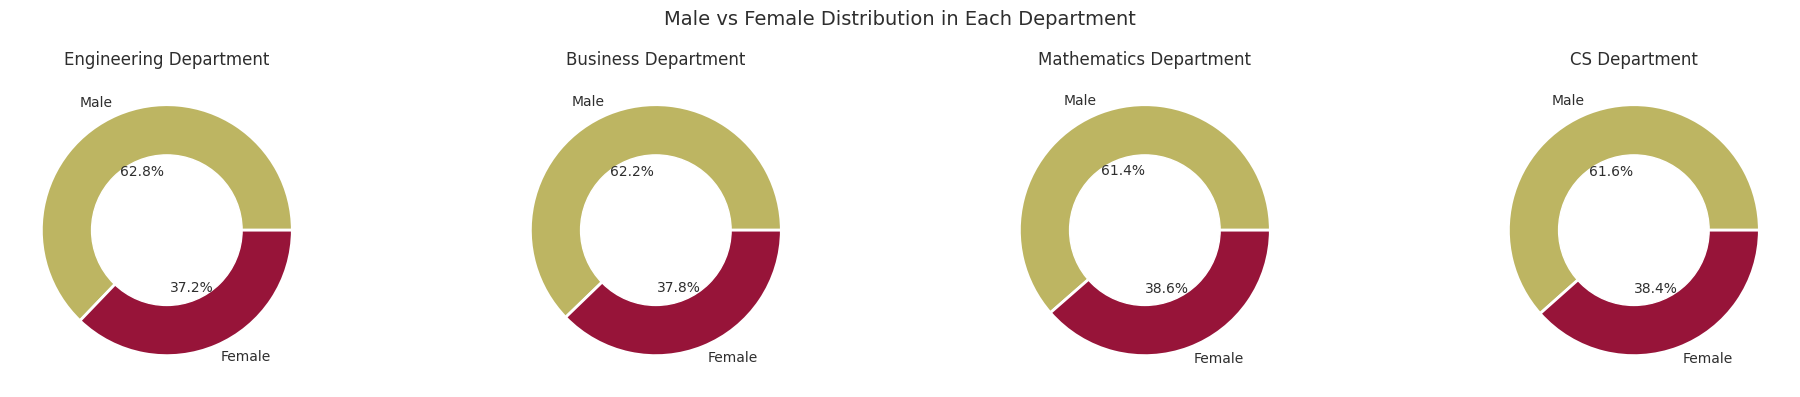

In [73]:
colors = {"Male": "#BDB562", "Female": "#971439"}

departments = df["Department"].unique()

fig, axes = plt.subplots(1, len(departments), figsize=(len(departments) * 5, 4))

if len(departments) == 1:
    axes = [axes]

for ax, department in zip(axes, departments):
    gender_counts = df[df["Department"] == department]["Gender"].value_counts()

    wedges, texts, autotexts = ax.pie(
        gender_counts,
        labels=gender_counts.index,
        colors=[colors[gender] for gender in gender_counts.index],
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
        textprops={'color': '#2E2E2E', 'fontsize': 10},
        labeldistance=1.1,
        pctdistance=0.5
    )

    center_circle = plt.Circle((0, 0), 0.6, color='white')
    ax.add_artist(center_circle)

    ax.set_title(f"{department} Department", fontsize=12, color="#2E2E2E")

plt.suptitle("Male vs Female Distribution in Each Department", fontsize=14, color="#2E2E2E")
plt.tight_layout()
plt.show()


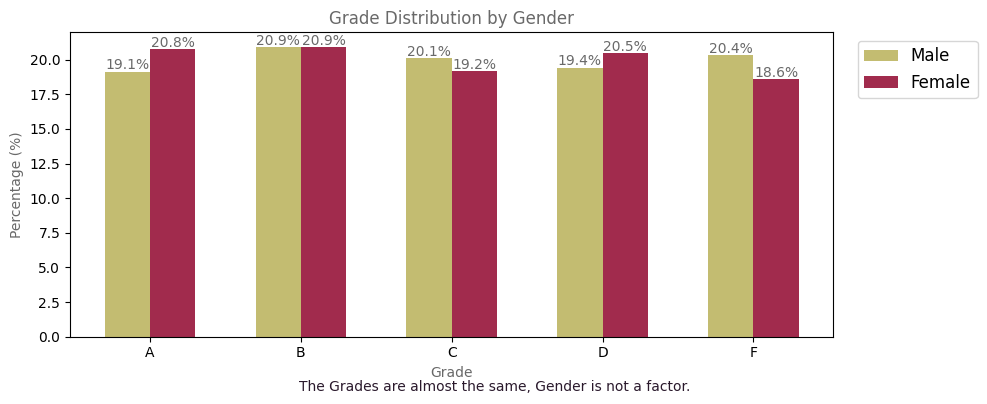

In [74]:
colors = {"Male": "#BDB562", "Female": "#971439"}

grade_order = ['A', 'B', 'C', 'D', 'F']

males_grades = df[df["Gender"] == "Male"]["Grade"].value_counts().reindex(grade_order)
females_grades = df[df["Gender"] == "Female"]["Grade"].value_counts().reindex(grade_order)

male_grades_percentage = (males_grades / males_grades.sum()) * 100
female_grades_percentage = (females_grades / females_grades.sum()) * 100

x = np.arange(len(grade_order))
width = 0.3

plt.figure(figsize=(10, 4))

plt.bar(x - width/2, male_grades_percentage, width, label='Male', color=colors["Male"], alpha=0.9)
plt.bar(x + width/2, female_grades_percentage, width, label='Female', color=colors["Female"], alpha=0.9)

plt.xlabel("Grade", color="dimgrey")
plt.ylabel("Percentage (%)", color="dimgrey")
plt.title("Grade Distribution by Gender", color="dimgrey")
plt.xticks(x, grade_order)


plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize=12)

for i in range(len(grade_order)):
    plt.text(x[i] - width/2, male_grades_percentage.iloc[i]+0.15 , f"{male_grades_percentage.iloc[i]:.1f}%", ha='center', color="dimgrey", fontsize=10)
    plt.text(x[i] + width/2, female_grades_percentage.iloc[i]+0.15 , f"{female_grades_percentage.iloc[i]:.1f}%", ha='center', color="dimgrey", fontsize=10)

plt.figtext(0.5, 0.01, "The Grades are almost the same, Gender is not a factor.", ha="center", fontsize=10, color=custom_colors[0])

plt.tight_layout()
plt.show()

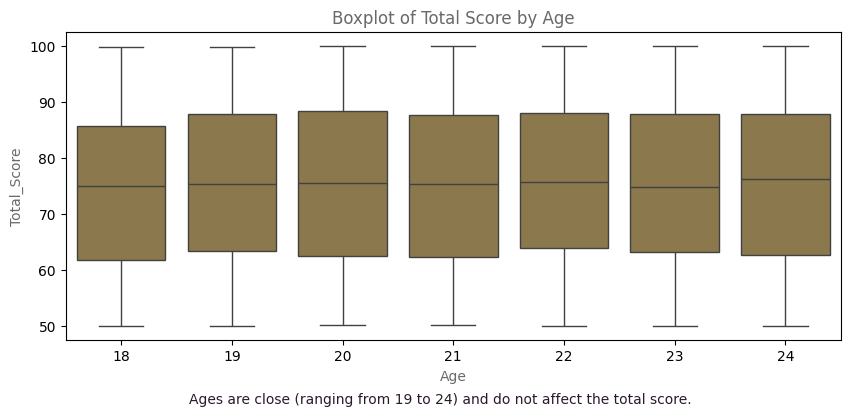

In [75]:
plt.figure(figsize=(10, 4))

axis = sns.boxplot(x="Age", y="Total_Score", data=df, color=custom_colors[4])
axis.xaxis.label.set_color('dimgrey')  # Change x-axis label color
axis.yaxis.label.set_color('dimgrey')  # Change y-axis label color

plt.title("Boxplot of Total Score by Age", color= "dimgrey")
plt.figtext(0.5, -0.05, "Ages are close (ranging from 19 to 24) and do not affect the total score.", ha="center", fontsize=10, color=custom_colors[0])

plt.show()

In [76]:
Study_Hours = df.groupby(["Gender", "Department"])["Study_Hours_per_Week"].mean().reset_index(name="Study_Hours_per_Week")

fig = px.bar(
    Study_Hours,
    x="Department",
    y="Study_Hours_per_Week",
    color="Gender",
    barmode="group",
    color_discrete_map={"Male": "#BDB562", "Female": "#971439"},
    title="Study Hours Distribution by Department and Gender",
    opacity = 0.8
)

fig.add_annotation(
    text="Gender Differences in Study Hours Appear Minimal Across Departments",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="center"
)

fig.show(renderer='iframe') #To display plotly graph 


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Identify correlations and patterns in student performance.¶
Since you've already completed data cleaning and exploratory data analysis (EDA) with visualizations, the next step is to conduct statistical analysis to identify correlations between different variables. These methods will help us understand what affects student performance and how we can improve it.

Correlation Matrix
It only works on numerical columns (ignores non-numeric data). The result is a square matrix where each value represents the correlation coefficient between two variables. The values range from -1 to 1:

1 → Perfect positive correlation

(when one increases, the other also increases).

0 → No correlation

(changes in one variable do not affect the other).

-1 → Perfect negative correlation

(when one increases, the other decreases).


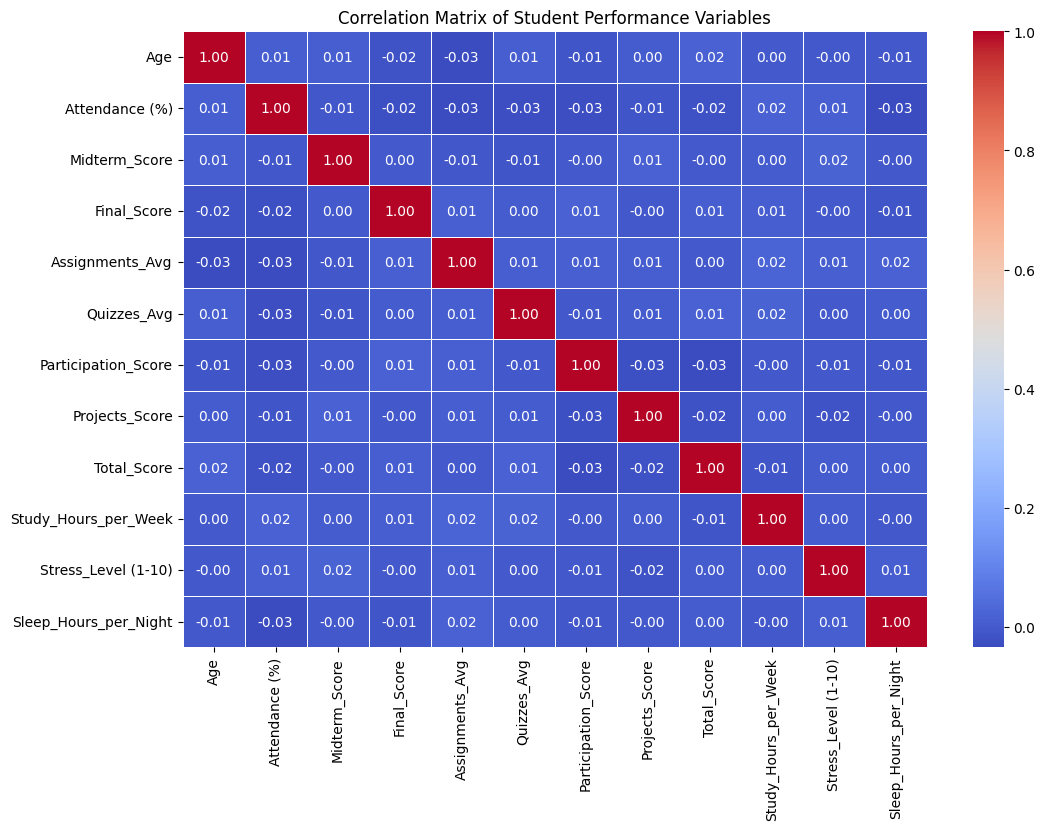

In [77]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Student Performance Variables")
plt.show()

2. Hypothesis Testing for Significant Relationships

A T-Test is used to compare the average performance of two groups and check if the difference is significant or just random.

The formula for the independent samples t-test is: 
(t=\frac{\={x}_{1}-\={x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}\) 
Where: 

(\={x}_{1}\) is the mean of the first sample.
(\={x}_{2}\) is the mean of the second sample. 
(s_{1}^{2}\) is the variance of the first sample. 
(s_{2}^{2}\) is the variance of the second sample. 
(n_{1}\) is the size of the first sample. 
(n_{2}\) is the size of the second sample.


In [80]:
from scipy.stats import ttest_ind

# T-Test for attendance impact on total scores
df = df.dropna(subset=["Attendance (%)", "Total_Score"])  # Handle missing values
high_attendance = df[df["Attendance (%)"] >= 75]["Total_Score"]
low_attendance = df[df["Attendance (%)"] < 75]["Total_Score"]

t_stat, p_value = ttest_ind(high_attendance, low_attendance, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a significant difference in total scores based on attendance.")
else:
    print("No significant difference in total scores based on attendance.")


# Function to perform a T-Test for categorical binary variables
def perform_ttest(group_col, num_col):
    """Perform an independent T-Test to compare means of two groups."""

    df_filtered = df.dropna(subset=[group_col, num_col])  # Drop NaN values
    unique_values = df_filtered[group_col].unique()

    if len(unique_values) == 2:
        group1, group2 = unique_values
        data1 = df_filtered[df_filtered[group_col] == group1][num_col]
        data2 = df_filtered[df_filtered[group_col] == group2][num_col]

        t_stat, p_value = ttest_ind(data1, data2, nan_policy='omit', equal_var=False)

        print(f"\nT-Test: {num_col} by {group_col} ({group1} vs. {group2})")
        print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")
        if p_value < 0.05:
            print(" ------- Significant difference found -------")
        else:
            print(" _____ No significant difference _____")
    else:
        print(f"Error: {group_col} must have exactly two unique values.")


# List of categorical binary variables
binary_columns = ["Gender", "Internet_Access_at_Home", "Extracurricular_Activities"]
# Numerical variable(s) to analyze
target_variables = ["Total_Score"]

# Perform T-Test for each binary variable
for cat_col in binary_columns:
    if df[cat_col].nunique() == 2:  # Ensure the variable is binary
        for num_col in target_variables:
            perform_ttest(cat_col, num_col)

T-statistic: -1.638, P-value: 0.102
No significant difference in total scores based on attendance.

T-Test: Total_Score by Gender (Male vs. Female)
T-Statistic: -1.906, P-Value: 0.057
 _____ No significant difference _____

T-Test: Total_Score by Internet_Access_at_Home (Yes vs. No)
T-Statistic: -0.947, P-Value: 0.344
 _____ No significant difference _____

T-Test: Total_Score by Extracurricular_Activities (No vs. Yes)
T-Statistic: -0.420, P-Value: 0.674
 _____ No significant difference _____


What is a P-Value?

The P-Value is a number between 0 and 1 that helps us decide if the results of a statistical test (like the T-Test) are meaningful or just due to random chance.

P-Value < 0.05: The result is statistically significant. This means the difference between the groups is likely real and not due to random chance.
P-Value ≥ 0.05: The result is not statistically significant. This means the difference between the groups could just be due to random chance.
3. Chi-Square Test The Chi-Square Test checks if there is a relationship between two categorical variables.

\(\chi ^{2}=\sum \frac{(O_{i}-E_{i})^{2}}{E_{i}}\) Where: \(\chi ^{2}\) is the Chi-Square statistic. \(\sum \) denotes the sum over all categories. \(O_{i}\) is the observed frequency in category \(i\). \(E_{i}\) is the expected frequency in category \(i\).

In [81]:
def perform_chi_square(cat_col, target_col="Grade"):
    """Check for a relationship between two categorical variables."""
    contingency_table = pd.crosstab(df[cat_col], df[target_col])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    print(f"\nChi-Square Test: {target_col} vs. {cat_col}")
    print(f"Chi-Square Statistic: {chi2_stat:.3f}, P-Value: {p_value:.3f}")
    if p_value < 0.05:
        print("-----Significant relationship found-----")
    else:
        print("_____No significant  relationship_____")


categorical_columns = [
    "Gender", "Department", "Internet_Access_at_Home", "Extracurricular_Activities",
    "Parent_Education_Level", "Family_Income_Level", "Study_Hours_per_Week"]

for cat_col in categorical_columns:
    perform_chi_square(cat_col)


Chi-Square Test: Grade vs. Gender
Chi-Square Statistic: 4.651, P-Value: 0.325
_____No significant  relationship_____

Chi-Square Test: Grade vs. Department
Chi-Square Statistic: 10.590, P-Value: 0.564
_____No significant  relationship_____

Chi-Square Test: Grade vs. Internet_Access_at_Home
Chi-Square Statistic: 3.671, P-Value: 0.452
_____No significant  relationship_____

Chi-Square Test: Grade vs. Extracurricular_Activities
Chi-Square Statistic: 3.370, P-Value: 0.498
_____No significant  relationship_____

Chi-Square Test: Grade vs. Parent_Education_Level
Chi-Square Statistic: 8.754, P-Value: 0.724
_____No significant  relationship_____

Chi-Square Test: Grade vs. Family_Income_Level
Chi-Square Statistic: 5.716, P-Value: 0.679
_____No significant  relationship_____

Chi-Square Test: Grade vs. Study_Hours_per_Week
Chi-Square Statistic: 1019.802, P-Value: 0.325
_____No significant  relationship_____


4. ANOVA Test

ANOVA (Analysis of Variance) is used to compare the average performance of three or more groups (e.g., students from different departments).

In [82]:
categorical_columns = ['Gender', 'Department', 'Parent_Education_Level',
                       'Family_Income_Level', 'Internet_Access_at_Home',
                       'Extracurricular_Activities', 'Study_Hours_per_Week', 'Grade']

target_variables = ['Total_Score']

for category in categorical_columns:
    if df[category].nunique() > 2:  # ANOVA requires 3+ categories
        print(f"\n **ANOVA Test for {category} vs. Total_Score**")


        model = ols(f'Total_Score ~ C({category})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        print(anova_table)

        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("-----Significant difference found! Performing Tukey's Post-Hoc Test...-----")

            tukey = pairwise_tukeyhsd(df['Total_Score'], df[category])
            print(tukey)
        else:
            print("_____No significant difference found_____")


 **ANOVA Test for Department vs. Total_Score**
                     sum_sq      df         F    PR(>F)
C(Department)  6.630518e+02     3.0  1.065913  0.362232
Residual       1.035921e+06  4996.0       NaN       NaN
_____No significant difference found_____

 **ANOVA Test for Parent_Education_Level vs. Total_Score**
                                 sum_sq      df         F   PR(>F)
C(Parent_Education_Level)  2.323559e+02     3.0  0.373377  0.77222
Residual                   1.036352e+06  4996.0       NaN      NaN
_____No significant difference found_____

 **ANOVA Test for Family_Income_Level vs. Total_Score**
                              sum_sq      df         F    PR(>F)
C(Family_Income_Level)  8.921135e+02     2.0  2.152131  0.116344
Residual                1.035692e+06  4997.0       NaN       NaN
_____No significant difference found_____

 **ANOVA Test for Study_Hours_per_Week vs. Total_Score**
                                sum_sq      df         F    PR(>F)
C(Study_Hours_per_We

Conclusion¶
This project aimed to analyze various factors affecting student academic performance, using statistical methods and visualizations to uncover key patterns. By leveraging techniques such as T-tests, ANOVA, and correlation analysis, we gained valuable insights into how different attributes ranging from attendance and parental education to study habits and stress levels—impact students' overall scores and grades.